In [2]:
#Name: Adarsh Yerneni
#regnno: 240953452 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [3]:
df = pd.read_csv("deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


C:\Users\Adarsh Yerneni\AppData\Local\Temp\ipykernel_1728\3730679432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index , y=data.values , palette = 'viridis')


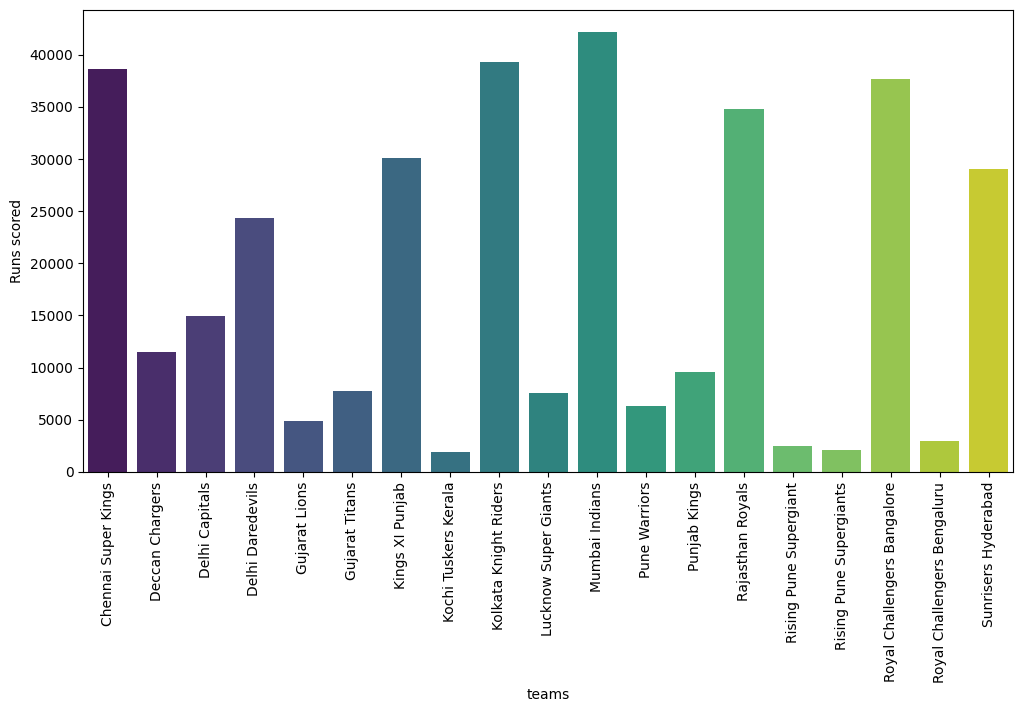

In [3]:
#1

data=df.groupby('batting_team')['total_runs'].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=data.index , y=data.values , palette = 'viridis')
plt.xticks(rotation = 90)
plt.xlabel('teams')
plt.ylabel('Runs scored')
plt.show()


In [4]:
#2
data=df.groupby('batter')['total_runs'].sum()
data.sort_values(ascending=False).head(10)

batter
V Kohli           8307
S Dhawan          7119
DA Warner         6910
RG Sharma         6884
SK Raina          5780
MS Dhoni          5505
AB de Villiers    5354
CH Gayle          5336
RV Uthappa        5246
KD Karthik        5066
Name: total_runs, dtype: int64

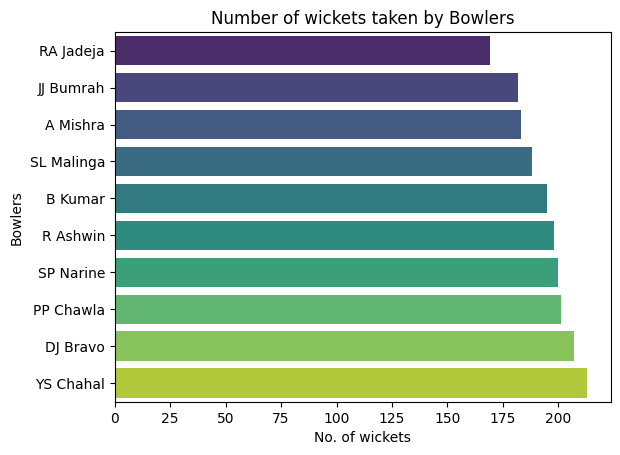

In [23]:
#3
data=df.groupby('bowler')['is_wicket'].sum()
data=data.sort_values().tail(10)
sns.barplot(x=data.values , y=data.index ,hue=data.index, palette='viridis')
plt.xlabel('No. of wickets')
plt.ylabel('Bowlers')
plt.title('Number of wickets taken by Bowlers')
plt.show()

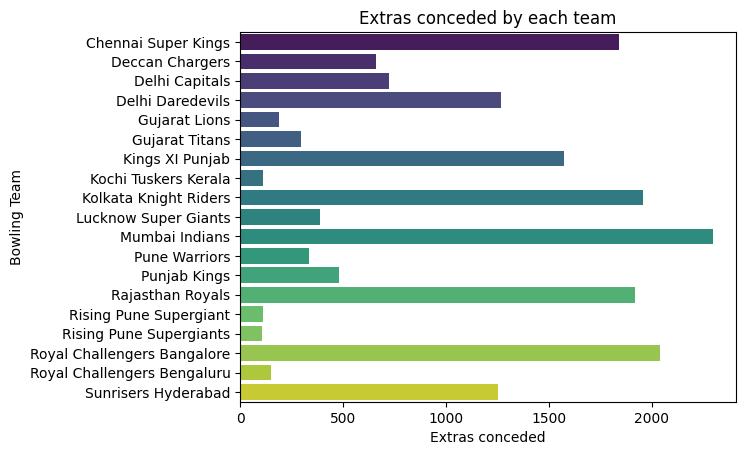

In [22]:
#4
data=df.groupby('bowling_team')['extra_runs'].sum()
#data
sns.barplot(x=data.values , y=data.index ,hue=data.index, palette='viridis' )
plt.xlabel("Extras conceded")
plt.ylabel("Bowling Team")
plt.title("Extras conceded by each team")
plt.show()

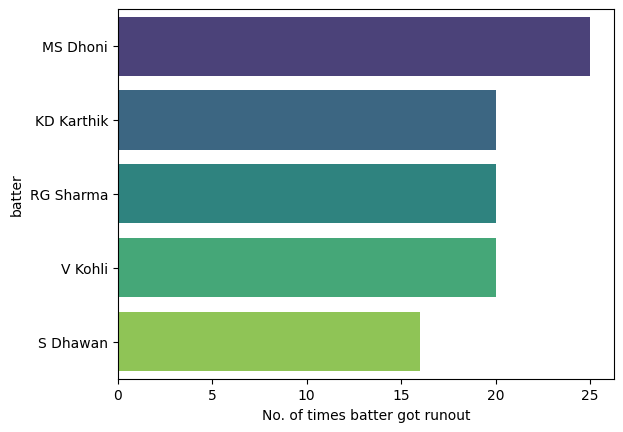

In [8]:
#5
data=df[df['dismissal_kind']=='run out']
occurences=data['batter'].value_counts()
#occcurences
fdata=occurences.head(5)
sns.barplot(x=fdata.values , y=fdata.index , palette='viridis',hue=fdata.index,legend=False)
plt.xlabel("No. of times batter got runout")
plt.show()

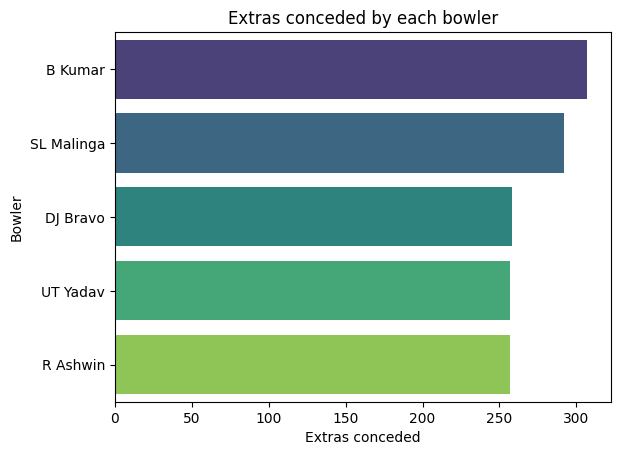

In [21]:
#6
data=df.groupby('bowler')['extra_runs'].sum()
data=data.sort_values(ascending=False).head(5)
sns.barplot(x=data.values , y=data.index ,hue=data.index, palette='viridis' )
plt.xlabel("Extras conceded")
plt.ylabel("Bowler")
plt.title("Extras conceded by each bowler")
plt.show()


Text(0.5, 1.0, 'Freuquencies of different dismissal kinds')

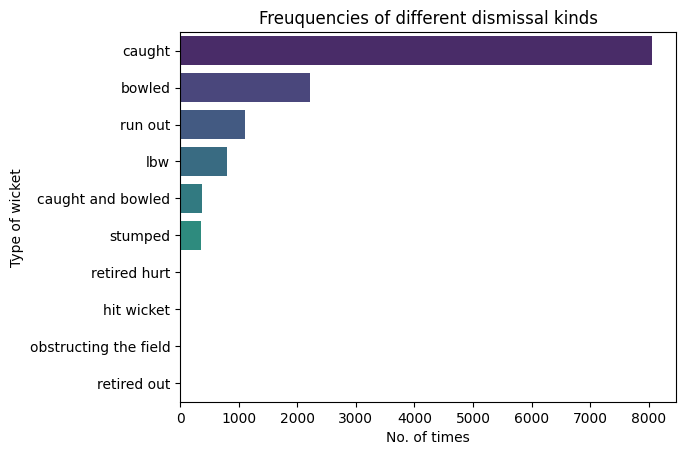

In [20]:
#7
data=df['dismissal_kind'].value_counts()
#data
sns.barplot(x=data.values , y=data.index ,hue=data.index, palette='viridis')
plt.ylabel('Type of wicket')
plt.xlabel('No. of times')
plt.title('Freuquencies of different dismissal kinds')

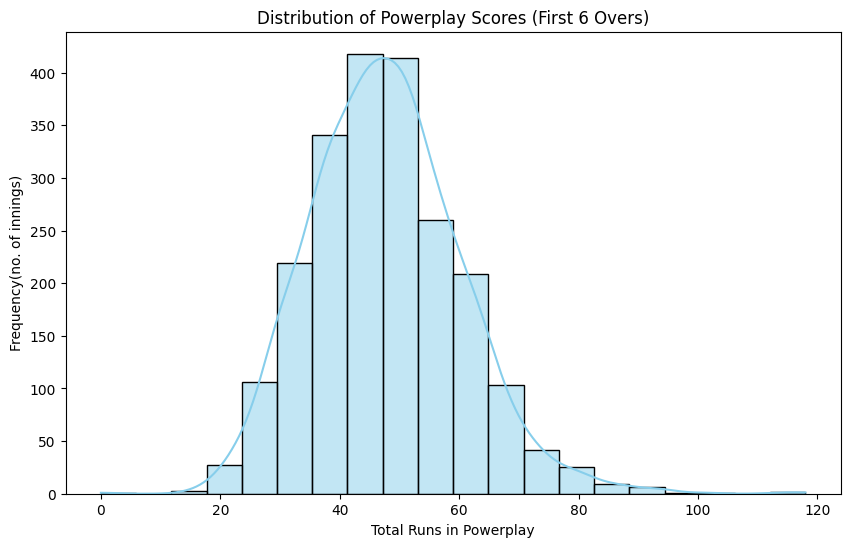

In [6]:
#9
powerplay_data = df[(df['over'] >= 1) & (df['over'] <= 6)]
powerplay_performance = powerplay_data.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
powerplay_performance
plt.figure(figsize=(10, 6))
sns.histplot(powerplay_performance['total_runs'],bins=20, kde=True, color='skyblue')
plt.title('Distribution of Powerplay Scores (First 6 Overs)')
plt.xlabel('Total Runs in Powerplay')
plt.ylabel('Frequency(no. of innings)')

plt.show()


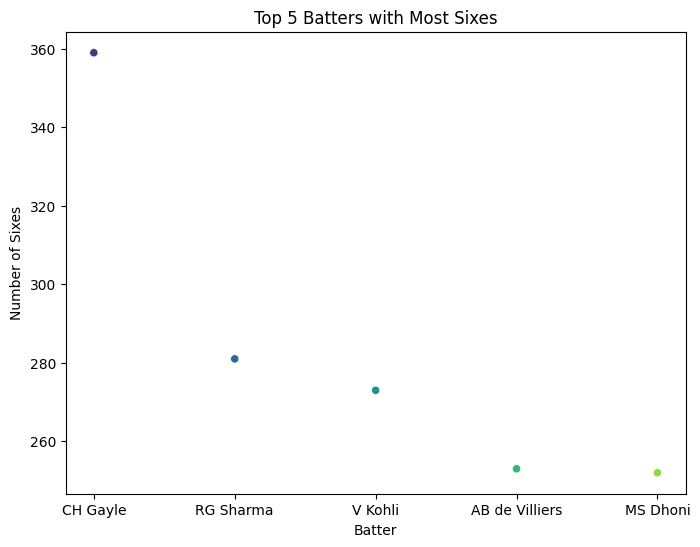

In [19]:
#10
#top batsman who have scored most 6's
data=df[df['batsman_runs']==6] #for top batsman with most 4's replace 6 with 4.
data=data['batter'].value_counts()
data=data.head(5)
#data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.index, y=data.values,hue=data.index, palette='viridis',legend=False)
plt.title('Top 5 Batters with Most Sixes')
plt.xlabel('Batter')
plt.ylabel('Number of Sixes')
plt.show()


